# Projet Velib - Analyse de données

Ce projet en Analyse de données à pour objectif d'étudier un jeu de données sur les chargements des stations de Velib dans la ville de Paris sur une période d'une semaine entre le 2 et le 7 septembre. 

Un premier jeu de données contient les taux de chargements des stations de distribution des vélos. 
* Un taux de chargement à 0 indique que la station est vide et qu'aucun vélo n'est disponible. 
* Un taux de chargement à 1 indique que la station est pleine et que tous les vélos qu'elle peut contenir sont disponibles. 

Un second jeu de données contient les coordonnées (logitude et latitude) associées à chaque station, ainsi qu'un élément Bonus.
* Un bonus à 1 signifie que la station est au sommet d'une colline ou se trouve sur un relief particulier. 
* Un bonus à 0 signifie que la station se situe au niveau du référentiel sur le plan de l'altitude. 

Du point de vue de l'analyse de données, les individus étudiés sont les stations. Il y a 168 variables qui correspondent aux 168 heures d'une semaine. 




# I- Etude descriptive du jeu de données

## Ouverture et étude des jeux de données

Nous allons importer les packages dont nous allons nous servir dans ce Notebook. Ils sont tous regroupés dans la cellule ci-contre.

In [28]:
rm(list = ls())   # erase everything, start from scratch!


In [76]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(readr)
library(viridis)


In [77]:
# direct loading from stored data on PLMlab
load('data/velib.RData')
summary(velib)

# alternative: load the data from package funFEM, where you have more information (help page)
# library(funFEM)
# data(velib)
# help("velib")

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

In [78]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


,longitude,latitude,bonus
,<dbl>,<dbl>,<dbl>
19117,2.377389,48.88630,0
17111,2.317591,48.89002,0
6103,2.330447,48.85030,0
15042,2.271396,48.83373,0
12003,2.366897,48.84589,0
13038,2.363335,48.82191,0


In [79]:
dimensions <- dim(coord)
print(dimensions)


[1] 1189    3


La table coord contient 1189 lignes et 4 colonnes.
Vérification que le dataframe ne contient pas de valeur manquantes


### Vérification que le dataframe ne contient pas de valeur manquantes

Il est maintenant intéressant de se demander si nos jeux de données sont complets, c'est à dire si les colonnes ne contiennent pas d'éléments vides, nuls ou à NaN.

In [80]:
# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'loading'

loading_missing_value <- sort(colSums(is.na(loading)), decreasing = TRUE)
cat('--- Loading ---\n')

print(sum(loading_missing_value))
cat('\n')

--- Loading ---
[1] 0



In [81]:
# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'coord'

coord_missing_value <- sort(colSums(is.na(coord)), decreasing = TRUE)
cat('--- Coord ---\n')

print(coord_missing_value)

--- Coord ---
longitude  latitude     bonus 
        0         0         0 


On a réalisé un affichage par odre décroissant avec 'ascending=False', cela nous permet d'affirmer qu'il n'y a pas de valeurs manquantes dans les jeux de données.

### Etude des valeurs dupliquées dans le dataframe 

On va étudier si nos jeux de données contiennent des lignes dupliquées, c'est à dire des lignes ou les valeurs dans chaque colonne sont les mêmes, pour toutes les colonnes observées, et de manière simultanée.

In [82]:
# Calcul des fréquences des noms des stations

station_names_counts <- table(coord$names)

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus

duplicates <- station_names_counts[station_names_counts > 1]

# Création d'un dataframe avec les noms et leurs fréquences

duplicates_df <- data.frame(names = names(duplicates), count = as.numeric(duplicates))

# Affichage du tableau des noms en doublons par ordre décroissant de fréquence

print(duplicates_df[order(duplicates_df$count, decreasing = TRUE), ])


numeric(0)


In [83]:


On va étudier si nos jeux de données contiennent des lignes dupliquées, c'est à dire des lignes ou les valeurs dans chaque colonne sont les mêmes, pour toutes les colonnes observées, et de manière simultanée.

cat('--- Loading ---\n')

cat(sum(duplicated(loading)), '\n\n')

cat('--- Coord ---\n')

cat(sum(duplicated(coord)), '\n')

--- Loading ---
0 

--- Coord ---
0 

Interprétation :

Sur le même principe que dans la cellule précédente, il n'y a pas de valeurs dupliquées dans nos jeux de données.
Etude des doublons dans le dataframe

Nous avons observé ci-dessus qu'il n'y a pas de lignes dupliquées dans nos jeux de données. Cependant, il faudrait étudier si le jeu de données présentant les coordonnées des stations nous donne plusieurs informations différentes pour une même station.

# Calcul des fréquences des noms des stations

station_names_counts <- table(coord$names)

​

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus

duplicates <- station_names_counts[station_names_counts > 1]

​

# Création d'un dataframe avec les noms et leurs fréquences

duplicates_df <- data.frame(names = names(duplicates), count = as.numeric(duplicates))

​

# Affichage du tableau des noms en doublons par ordre décroissant de fréquence

print(duplicates_df[order(duplicates_df$count, decreasing = TRUE), ])

​

                    names count
12      GARE D'AUSTERLITZ     3
21        PORTE DES LILAS     3
1         ALEXANDRE DUMAS     2
2                 AQUEDUC     2
3                BASTILLE     2
4              BELLEVILLE     2
5       BOURSE DU TRAVAIL     2
6                BROCHANT     2
7            CHERCHE MIDI     2
8                  CLICHY     2
9                    DODU     2
10  FAURE (AUBERVILLIERS)     2
11     FRANCE (LEVALLOIS)     2
13          GARE DE L'EST     2
14               JOURDAIN     2
15               LACEPEDE     2
16               LEGENDRE     2
17     PARC DE BELLEVILLE     2
18             PORT ROYAL     2
19      PORTE DE BAGNOLET     2
20    PORTE DE SAINT OUEN     2
22         RICHARD LENOIR     2
23         SAINT AUGUSTIN     2
24           SAINT HONORE     2
25           SAINT MARCEL     2
26     WILSON (LEVALLOIS)     2

Interprétation :

Cette commande indique le nombre d'occurences des stations. Ainsi, nous pouvons voir que la station PORTE DES LILAS et la station GARE D'AUSTERLITZ apparaissent 3 fois dans notre jeu de données par exemple. On en déduit que notre dataset contient 26 éléments qui aparaissent deux fois ou plus.

# Filtrage pour ne garder que le premier nom de la liste des doublons

name <- names(station_names_counts)[1]

​

# Sélection des lignes du dataframe pour le premier nom en doublon

result <- coord[coord$names == name, ]

​

# Affichage du résultat sous forme de tableau

print(result)

​

      longitude latitude bonus               names
15107   2.28548 48.83357     0   PALAIS DES SPORTS

Interprétation :

Cette commande permet de visualiser un élément de la liste affichée dans la cellule précédente. Ainsi, pour la station PORTE DES LILAS, nous confirmons qu'elle apparaît bien 3 fois dans notre jeu de données. La première colonne indique les numéros de lignes auxquelles les occurences de la station apparaissent. L'élément bonus indique que la station se situe en hauteur d'une colline lorsque bonus prend la valeur 1. Ces occurences diffèrent au niveau des coordonnées géographiques de la station. Il pourrait y avoir des erreurs de saisie ou de transcription des coordonnées géographiques. Si plusieurs bornes de stationnement sont présentes dans une zone proche et sont enregistrées sous le même nom de station dans la base de données, cela pourrait expliquer les différentes coordonnées. Les coordonnées pourraient avoir été collectées à l'aide de différents instruments ou méthodes, ce qui peut entraîner des variations dans les données enregistrées

# Installer la bibliothèque dplyr si ce n'est pas déjà fait

# install.package# Calcul des fréquences des noms des stations

station_names_counts <- table(coord$names)

​

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus

duplicates <- station_names_counts[station_names_counts > 1]

​

# Création d'un dataframe avec les noms et leurs fréquences

duplicates_df <- data.frame(names = names(duplicates), count = as.numeric(duplicates))

​

# Affichage du tableau des noms en doublons par ordre décroissant de fréquence

print(duplicates_df[order(duplicates_df$count, decreasing = TRUE), ])

s("dplyr")

​

# Charger la bibliothèque dplyr

library(dplyr)

​

# Calcul des fréquences des noms des stations

station_names_counts <- table(coord$names)

​

# Création d'un dataframe avec les noms et leurs fréquences

duplicates_df <- data.frame(names = names(station_names_counts), count = as.numeric(station_names_counts))

​

# Filtrage pour ne garder que le premier nom de la liste des doublons

name <- duplicates_df %>% arrange(desc(count)) %>% head(1) %>% pull(names)

​

# Sélection des lignes du dataframe pour le premier nom en doublon

result <- coord %>% filter(names == name)

​

# Affichage du résultat sous forme de tableau

print(result)

​

Visualisation des données de chargement
Comparaison des stations

Nous souhaitons observer l'évolution du taux de chargement d'un pannel de stations au cours de la semaine. Cela va nous permettre, dans un premier temps, de faire des hypothèses sur les tendances d'utilisations des vélos en fonction des jours de la semaine, ou des moments de la journée. Dans un second temps, nous allons pouvoir comparer les différences entre les stations de notre pannel. L'idée est de voir si les taux de chargements sont similaires d'une station à l'autre, ou si on observe des variations radicales en fonction des stations de vélib.

Pour cela, nous allons représenter les courbes des évolutions des taux de chargement pour un pannel de 16 stations choisies au hasard dans la liste de notre jeu de données. Nous allons, pour chaque graphique, représenter des lignes verticales correspondant aux séparations des jours de la semaine. Et en représentant nos 16 graphiques simultanément, nous allons pouvoir réaliser l'étude présentée ci-dessus.

​

options(repr.plot.width = 15, repr.plot.height = 10)

​

timeTick = 1 + 24*(0:6)  # vector corresponding to the beginning of days

​

# select 16 stations

stations = sample.int(nrow(loading), 16)

​

df = melt(loading[stations,])  #the function melt reshapes it from wide to long

​

p = list()

for (i in 1:16){

    dfi = df[df$Var1 == velib$names[stations[i]],]

    p[[i]] = ggplot(dfi, aes(x=Var2, y=value)) + 

        geom_line(col="darkorchid") + 

        geom_vline(xintercept=timeTick, col="orange", linetype="dashed") +

        labs(title=velib$names[stations[i]])

}

do.call(grid.arrange,p)

Interprétation :

On observe une série de graphiques qui représentent le niveau de chargement des stations de Vélib à Paris sur une période de temps d'une semaine, avec des intervalles de temps horaires sur l'axe des abscisses (Time) et le niveau de chargement sur l'axe des ordonnées (Loading).

    Variations temporelles : Chaque graphique montre les variations dans la semaine du nombre de vélos disponibles dans chaque station, parmis 16 prises au hasard. Les pics à 1 indiquent que tous les vélos sont disponibles à ce moment-là. On observe les périodes de la journée où les vélos sont les plus utilisés (les creux dans les graphiques), cela poueeait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. On remarque une temporalité dans certaines stations, avec des taux de chargements similaires sur les 5 premiers jours de la semaine, et des différences au niveau des chargements les week-ends. Les pics correspondes aux périodes où les vélos sont les moins disponibles, c'est à dire les moments où les taux de chargements des stations Vélib sont les plus grands.

    Comparaison entre les stations : En comparant les graphiques entre eux, on peut identifier les stations qui ont un taux de rotation élevé des vélos (grand nombre de variations entre des valeurs élevées et basses) et celles qui sont moins utilisées (moins de variation ou des niveaux plus constants).

Etude du chargement médian des stations

Avec les courbes précédentes, nous avons pu constater des variations importantes entre les stations. Malgré cela, on retrouve une similarité commune sur la temporalité et les similarités observées sur certains jours. Nous allons étudier le chargement médian des stations pour étudier cette temporalité. Le plus pertinent est ici d'afficher une superposition de boxplots, afin d'étudier la valeur médiane, ainsi que les valeurs des quantiles, en fonction des heures tout au long de la semaine.

​

options(repr.plot.width = 15, repr.plot.height = 6)

​

df = melt(loading)

p1 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 

    geom_boxplot(alpha=.3, show.legend = FALSE) +

    xlab('') + ylab('') + theme_minimal()

​

# --- #

​

# Only a third of the data

df = melt(loading[ seq(from=1, to=+floor(nrow(loading)/3)) ,])

p2 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 

    geom_boxplot(alpha=.3, show.legend = FALSE) +

    xlab('') + ylab('')

​

# The next third

df = melt(loading[ seq(from=1+floor(nrow(loading)/3), to=2*floor(nrow(loading)/3)) ,])

p3 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 

    geom_boxplot(alpha=.3, show.legend = FALSE) +

    xlab('') + ylab('')

​

# The remaining third

df = melt(loading[ seq(from=1+2*floor(nrow(loading)/3), to=nrow(loading)) ,])

p4 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 

    geom_boxplot(alpha=.3, show.legend = FALSE) +

    xlab('') + ylab('')

​

# --- #

​

grid.arrange(p1, p2, p3, p4, nrow=4)

# changer l'affihage en utilisant éventuelelment des représentations avec des lignes, 

# ou un affichage des médianes uniuement (mais on ne voit pas l'amplitude), ou en

# changeant de librairies

Interprétation :

Ce graphique présente une superposition de boxplots montrant l'évolution du chargement des stations vélib au cours du temps horaire sur une semaine.

    Série temporelle : La ligne rouge représente la médiane du chargement des stations au fil du temps. Elle montre comment le niveau de chargement change. Ainsi, on peut identifier un modèle cyclique sur les 5 premiers jours de la semaine, qui pourrait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. Ainsi, on voit une forte diminution du taux de chargement tous les matins du lundi au vendredi à la même heure et de la même amplitude sur le boxplot. Puis, le taux de chargement remonte progressivement dans la journée, de manière similaire sur les jours ouvrés. Pour le week-end, on remarque une différence avec une forte atténuation de cet effet pendulaire. Le taux de chargement est plus constant au cours de la journée, avec une forte diminution correspondant à une plus forte utilisation des vélos en fin de journée sur le samedi et dimanche.

    Amplitude des valeurs : On observe un écart très important entre le premier et le troisième quartile, ce qui traduit une grande variation du taux de chargement entre les stations. De plus, la valeur du premier quartile augmente fortement au cours de la matinée. Cela traduit le fait que beaucoup de stations se déchargent sur cette période. Cela se remarque aussi avec les pics bi-pendulaires observés sur le troisème quartile. En effet, on remarque deux pics bien plus bas que sur les box-plots des autres horaires. Ces pics correspondents aux moments de la journée où les vélos sont les plus utilisés : la valeur du troisième quartile diminue nettement.

Etude de la temporalité du chargement moyen au cours de la semaine

Nous avons émis des conjectures sur la similarité de l'évolution des taux de chargement sur less jours de travail, ainsi qu'une différence observée au niveau des week-ends. Nous souhaitons vérifier cette hypothèse. Pour ce faire, nous allons calculer le chargement moyen des sttions sur chaque heure d'une journée, puis comparer l'évolution de cette moyenne en fonction des jours de la semaine. Il est pertinent d'afficher l'évolution de la moyenne sur l'ensemble des jours de la semaine pour étudier la tendance suivie.

mean_per_hour_per_day = colMeans(loading)

mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)

mean_per_hour         = rowMeans(mean_per_hour_per_day)

​

# --- #

​

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)

colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")

mean_per_hour_per_day$time_range = c(1:24)

mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

​

mean_per_hour            = as.data.frame(mean_per_hour)

colnames(mean_per_hour)  = list("Weekly")

mean_per_hour$time_range = c(1:24)

​

# --- #

​

options(repr.plot.width = 15, repr.plot.height = 10)

​

ggplot() + 

    geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 

    geom_line(data=mean_per_hour, aes(x=time_range, y=Weekly), linewidth = 1.5)

​

#rajouter un titre 

Interprétation :

Tout d'abord, on peut visualiser des variations quotidiennes. Chaque ligne colorée représente un jour différent de la semaine, et la ligne noire représente la moyenne sur toute la semaine. On peut observer les tendances de chargement des stations pour chaque jour travaillé. On confirme également que le taux de chargement est différent pendant les week-ends, avec néanmoins une similarité observée entre le samedi et le dimanche. De plus, la moyenne hebdomadaire suit la tendance des jours travaillés.

On remarque aussi des pics et des creux. Les pics représentent les heures où les stations sont les plus chargées en moyenne, ce qui pourrait correspondre aux heures avant que les gens ne se rendent au travail ou à l'école. Les creux représentent les heures où les stations sont les moins chargées, ce qui pourrait correspondre aux heures de pointe où les vélos sont utilisés pour les trajets. Cela va dans le même sens que nos hypothèses sur les boxplots superposés.

On peut en déduire des habitudes dans les comportements des utilisateurs. Par exemple, si les stations sont moins chargées vers 8h et 18h, cela pourrait indiquer les heures de début et de fin de journée de travail typiques.

En examinant les différences entre les jours de la semaine, on peut identifier des tendances spécifiques, comme des jours avec une plus grande utilisation des vélos. Par exemple, si les lignes pour le samedi et le dimanche montrent un chargement plus élevé pendant la journée, cela pourrait indiquer une utilisation récréative plus importante pendant les week-ends.
Etude des stations vélib sur une carte

Nous avons constaté des fortes disparités du taux de chargement en fonction des stations en affichant le pannel aléatoir de 16 sations de notre jeu de données. Nous nous demandons si cette disparité est due à l'emplacement géographique des stations. Par exemple, nous pouvons nous demander si le fait que certaines stations commencent la journée avec un taux de chargement faible pourraient être des stations se situant dans des quartiers de bureaux (généralement au centre, vers La Défense...), et se remplissent fortement dans la matinée. A contrario, certaines stations situées en périphérie pourraient commencer la journée avec un taux de remplissage élevé, puis se vider sur la période de départ au travail/école, et se remplir à nouveau en fin de journée.

Pour étudier cela, nous allons étudier le taux de remplissage des staions sur une carte sur une même journée, à différents moments.

# Hours to be displayed

options(repr.plot.width = 13, repr.plot.height = 10)

hours = c(6, 12, 23) # Monday at hour 6h, 12h, 23h

​

dfi = coord

p = list()

for (i in 1:length(hours)){

    dfi$loading = loading[,hours[i]]

    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 

        geom_point() +

        labs(title = paste("Stations loading - Monday",hours[i],"h"))

}

​

do.call(grid.arrange,c(p, ncol=2))

Les axes représentent la latitude et la longitude, positionnant ainsi les stations de Vélib sur une carte de Paris. La couleur de chaque point représente le niveau de chargement de la station à l'heure indiquée, avec un code couleur allant du violet (peu ou pas de vélos disponibles) au jaune (station complètement chargée).

    Analyse à 6 heures (premier graphique à gauche) :

À 6 heures du matin, on observe une majorité de stations avec un chargement moyen à élevé (beaucoup de points jaunes et oranges). Cela suggère que les vélos ne sont pas encore largement utilisés à cette heure, ce qui est attendu tôt le matin. Et confirme l'hypothèse sur les stations en banlieu ou périphérie.

    Analyse à 12 heures (graphique du milieu) :

À midi, les couleurs sont peu variées. En effet, les stations sont soit assez pleines, soit assez vides. Il n'y a pas vraiment de station avec un taux de chargement moyen. De plus, on observe un regroupement central des stations présentant de la disponibilité. Ce regroupement peut correspondre aux quartiers de bureaux.

    Analyse à 23 heures (dernier graphique à droite) :

À 23 heures, on observe une situation qui se rapproche de celle du même jour à 6h du matin. La répartition est plus homogène et les stations sont globalement chargées, les vélos sont disponibles, il y compris en périphérie.Cela pourrait indiquer que les gens ont tendance à moins utiliser les vélos en fin de soirée, qu'ils sont rentrés dans des quartiers résidentiels, ou que les vélos ont été retournés aux stations après les déplacements de la journée.

Ces cartes de chaleur peuvent également aider les gestionnaires de Vélib à identifier les zones où il y a une demande élevée de vélos à certaines heures, et où un rééquilibrage pourrait être nécessaire pour s'assurer que les utilisateurs trouvent des vélos disponibles en fonction de l'heure.

Finalement, cette analyse concorde avec nos hypothèses sur les taux de remplissages en fonction des types de quartiers (résidentiels ou de bureaux). ).
Etude des déplacements pendulaires sur une carte

Pour mettre en lumière les déplacements pendulaires, et ainsi confirmer ou invalider nos hypothèses, nous allons représenter ce même style de graphique avant les déplacements pendulaires (par exmple le matin assez tôt), et après (par exemple en milieu de matinée).

# Hours to be displayed

options(repr.plot.width = 13, repr.plot.height = 10)

hours = c(6, 11) # Monday at hour 6h, 11h

​

dfi = coord

p = list()

for (i in 1:length(hours)){

    dfi$loading = loading[,hours[i]]

    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 

        geom_point() +

        labs(title = paste("Stations loading - Monday",hours[i],"h"))

}

​

do.call(grid.arrange,c(p, ncol=2))

Interprétation :

Sur cette carte, nous observons clairement que les stations en périphérie se vident au profit des stations au centre. De plus, puisque les tendances observées sur tous les jours travaillés sont les mêmes (cf : Etude de la temporalité du chargement moyen au cours de la semaine), on peut alors valider notre hypothèse selon laquelle les déplacements pendulaires font que les vélos sont utilisés de l'extérieur de la ville vers le centre, où sont regroupés les quartiers de bureaux.
Influence de l'altitude des stations sur les taux de chargement

Nous avons présenté la colonne bonus dans l'introduction de ce projet. Nous allons regarder si cet élément à une influence sur le taux de chargement des stations. Pour ce faire, nous allons commencer par étudier la répartition des stations en altitude.

# Créer un dataframe avec les données

df <- data.frame(size = c(sum(coord$bonus == 0), sum(coord$bonus == 1)),

                 labels = c('No hill', 'Hill'))

​

# Calculer les pourcentages

df$percentage <- df$size / sum(df$size) * 100

​

# Créer le graphique en coordonnées polaires avec ggplot2

ggplot(df, aes(x = "", y = percentage, fill = labels)) +

  geom_bar(stat = "identity", width = 1, position = "fill") +

  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_fill(vjust = 0.5)) +

  coord_polar(theta = "y") +

  scale_fill_hue(direction = -1) +  # pour inverser l'ordre du colormap par défaut

  theme_void()

​

Interprétation : 

​

La grande majorité des stations Vélib, soit 89.3%, sont situées en plaine. Cela suggère que la plupart des stations sont dans des zones relativement plates de la ville. Seulement 10.7% des stations sont situées en altitude. Ces stations peuvent se trouver sur des collines ou dans des zones élevées de la ville.

​

Cette répartition peut avoir des implications sur l'usage des vélos. Les stations en plaine sont probablement plus fréquentées en raison de la facilité de pédalage sur terrain plat. Les stations en altitude pourraient avoir moins de fréquentation en raison de l'effort supplémentaire requis pour y accéder ou en partir, bien qu'elles puissent servir des zones résidentielles situées en hauteur.

​

Cela peut avoir un impact sur des opérations logistiques. Il peut y avoir des opérations de rééquilibrage des vélos (s'assurer que les stations ne soient ni vides ni pleines). Il peut être plus difficile de maintenir un bon équilibre pour les stations en altitude, en particulier si les utilisateurs ont tendance à prendre les vélos en descente et non en montée.

Représentation des stations en altitude sur une carte

Nous allons étudier la répartition géographique des stations en altitude. De manière analogue aux première visualisations sur cartes, nous allons représenter la répartition des stations en altitude sous forme de nuage de points. En s'appuyant sur nos observations précédentes, nous allons voir si cet élément peut avoir une influence sur les chargements des stations.

Nous allons également juxtaposer la carte montrant le taux de chargement à 6h du matin pour comparer avec le taux de chargement des stations.

coord$hill = as.factor(coord$bonus)

levels(coord$hill) = c('No hill','Hill')

​

# --- #

​

options(repr.plot.width = 10, repr.plot.height = 10)

​

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 

    geom_point() +

    scale_color_hue(direction = -1) +

    labs(title = 'Hilltop stations')

​

options(repr.plot.width = 10, repr.plot.height = 10)

​

qmplot(data=coord, longitude, latitude, color=hill) +

    scale_color_hue(direction = -1) +

    labs(title = 'Hilltop stations')

​

Error in qmplot(data = coord, longitude, latitude, color = hill): impossible de trouver la fonction "qmplot"
Traceback:

# Installer les bibliothèques nécessaires si ce n'est pas déjà fait

# install.packages("ggplot2")

# install.packages("viridis")

# install.packages("ggthemes")

​

# Charger les bibliothèques

library(ggplot2)

library(viridis)

library(ggthemes)

​

# Définir les heures de la journée

hours <- c(6)

​

# Définir la taille du graphique

s <- 10

n <- length(hours) + 1

​

# Créer le graphique avec ggplot2

fig <- ggplot() +

  theme_minimal() +  # Choisissez le thème en fonction de vos préférences

​

# Premier sous-graphique : Chargement des stations

fig <- fig +

  geom_point(data = coord, aes(x = longitude, y = latitude, color = loading_data[, hours]), size = 3) +

  scale_color_viridis_c() +

  ggtitle(paste('Chargement des stations - Lundi à', hours, 'h')) +

  theme(plot.title = element_text(size = 25))

​

# Deuxième sous-graphique : Répartition des stations en altitude

fig <- fig +

  geom_point(data = coord, aes(x = longitude, y = latitude, color = bonus), size = 3) +

  scale_color_tableau() +

  ggtitle('Répartition des stations en altitude') +

  theme(plot.title = element_text(size = 25))

​

# Afficher le graphique

print(fig)

​

-
Variables
Callstack

Breakpoints
Source
Kernel Sources
0
0
R | Idle
# help("velib")

ERROR: Error in parse(text = x, srcfile = src): <text>:3:4: symbole inattendu
2: 
3: On va
      ^


In [ ]:
### Visualisation

Dans un premier temps, nous allons ouvrir et visualiser les premières lignes de nos deux dataset. L'objectif est d'avoir un apperçu de nos jeux de données, avec leurs tailles, variables et individus étudiés.

In [45]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]
coord$names = velib$names[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


,longitude,latitude,bonus,names
,<dbl>,<dbl>,<dbl>,<chr>
19117,2.377389,48.88630,0,EURYALE DEHAYNIN
17111,2.317591,48.89002,0,LEMERCIER
6103,2.330447,48.85030,0,MEZIERES RENNES
15042,2.271396,48.83373,0,FARMAN
12003,2.366897,48.84589,0,QUAI DE LA RAPEE
13038,2.363335,48.82191,0,CHOISY POINT D'IVRY


In [46]:
dimensions <- dim(coord)
print(dimensions)


[1] 1189    4


La table coord contient 1189 lignes et 4 colonnes.

### Vérification que le dataframe ne contient pas de valeur manquantes

Il est maintenant intéressant de se demander si nos jeux de données sont complets, c'est à dire si les colonnes ne contiennent pas d'éléments vides, nuls ou à NaN.

In [47]:
# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'loading'
loading_missing_value <- sort(colSums(is.na(loading)), decreasing = TRUE)

cat('--- Loading ---\n')

print(sum(loading_missing_value))

cat('\n')

# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'coord'
coord_missing_value <- sort(colSums(is.na(coord)), decreasing = TRUE)

cat('--- Coord ---\n')

print(coord_missing_value)


--- Loading ---
[1] 0

--- Coord ---
longitude  latitude     bonus     names 
        0         0         0         0 


Interprétation : 

On a réalisé un affichage par ordre décroissant, cela nous permet d'affirmer qu'il n'y a pas de valeurs manquantes dans les jeux de données.

### Etude des valeurs dupliquées dans le dataframe

On va étudier si nos jeux de données contiennent des lignes dupliquées, c'est à dire des lignes ou les valeurs dans chaque colonne sont les mêmes, pour toutes les colonnes observées, et de manière simultanée.

In [48]:
cat('--- Loading ---\n')
cat(sum(duplicated(loading)), '\n\n')
cat('--- Coord ---\n')
cat(sum(duplicated(coord)), '\n')

--- Loading ---
0 

--- Coord ---
0 


Interprétation : 

Sur le même principe que dans la cellule précédente, il n'y a pas de valeurs dupliquées dans nos jeux de données.

### Etude des doublons dans le dataframe 

Nous avons observé ci-dessus qu'il n'y a pas de lignes dupliquées dans nos jeux de données. Cependant, il faudrait étudier si le jeu de données présentant les coordonnées des stations nous donne plusieurs informations différentes pour une même station. 

In [85]:
# Calcul des fréquences des noms des stations
station_names_counts <- table(coord$names)

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus
duplicates <- station_names_counts[station_names_counts > 1]

# Création d'un dataframe avec les noms et leurs fréquences
duplicates_df <- data.frame(names = names(duplicates), count = as.numeric(duplicates))

# Affichage du tableau des noms en doublons par ordre décroissant de fréquence
print(duplicates_df[order(duplicates_df$count, decreasing = TRUE), ])


numeric(0)


Interprétation : 

Cette commande indique le nombre d'occurences des stations. Ainsi, nous pouvons voir que la station PORTE DES LILAS et la station GARE D'AUSTERLITZ apparaissent 3 fois dans notre jeu de données par exemple. On en déduit que notre dataset contient 26 éléments qui aparaissent deux fois ou plus. 

In [84]:
# Filtrage pour ne garder que le premier nom de la liste des doublons
name <- names(station_names_counts)[1]

# Sélection des lignes du dataframe pour le premier nom en doublon
result <- coord[coord$names == name, ]

# Affichage du résultat sous forme de tableau
print(result)


[1] longitude latitude  bonus    
<0 lignes> (ou 'row.names' de longueur nulle)


Interprétation : 

Cette commande permet de visualiser un élément de la liste affichée dans la cellule précédente. Ainsi, pour la station PORTE DES LILAS, nous confirmons qu'elle apparaît bien 3 fois dans notre jeu de données. La première colonne indique les numéros de lignes auxquelles les occurences de la station apparaissent.  L'élément bonus indique que la station se situe en hauteur d'une colline lorsque bonus prend la valeur 1. Ces occurences diffèrent au niveau des coordonnées géographiques de la station. Il pourrait y avoir des erreurs de saisie ou de transcription des coordonnées géographiques. Si plusieurs bornes de stationnement sont présentes dans une zone proche et sont enregistrées sous le même nom de station dans la base de données, cela pourrait expliquer les différentes coordonnées. Les coordonnées pourraient avoir été collectées à l'aide de différents instruments ou méthodes, ce qui peut entraîner des variations dans les données enregistrées

In [ ]:
# Installer la bibliothèque dplyr si ce n'est pas déjà fait
# install.package# Calcul des fréquences des noms des stations
station_names_counts <- table(coord$names)

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus
duplicates <- station_names_counts[station_names_counts > 1]

# Création d'un dataframe avec les noms et leurs fréquences
duplicates_df <- data.frame(names = names(duplicates), count = as.numeric(duplicates))

# Affichage du tableau des noms en doublons par ordre décroissant de fréquence
print(duplicates_df[order(duplicates_df$count, decreasing = TRUE), ])
s("dplyr")

# Charger la bibliothèque dplyr
library(dplyr)

# Calcul des fréquences des noms des stations
station_names_counts <- table(coord$names)

# Création d'un dataframe avec les noms et leurs fréquences
duplicates_df <- data.frame(names = names(station_names_counts), count = as.numeric(station_names_counts))

# Filtrage pour ne garder que le premier nom de la liste des doublons
name <- duplicates_df %>% arrange(desc(count)) %>% head(1) %>% pull(names)

# Sélection des lignes du dataframe pour le premier nom en doublon
result <- coord %>% filter(names == name)

# Affichage du résultat sous forme de tableau
print(result)


## Visualisation des données de chargement

### Comparaison des stations

Nous souhaitons observer l'évolution du taux de chargement d'un pannel de stations au cours de la semaine. Cela va nous permettre, dans un premier temps, de faire des hypothèses sur les tendances d'utilisations des vélos en fonction des jours de la semaine, ou des moments de la journée. Dans un second temps, nous allons pouvoir comparer les différences entre les stations de notre pannel. L'idée est de voir si les taux de chargements sont similaires d'une station à l'autre, ou si on observe des variations radicales en fonction des stations de vélib. 

Pour cela, nous allons représenter les courbes des évolutions des taux de chargement pour un pannel de 16 stations choisies au hasard dans la liste de notre jeu de données. Nous allons, pour chaque graphique, représenter des lignes verticales correspondant aux séparations des jours de la semaine. Et en représentant nos 16 graphiques simultanément, nous allons pouvoir réaliser l'étude présentée ci-dessus.

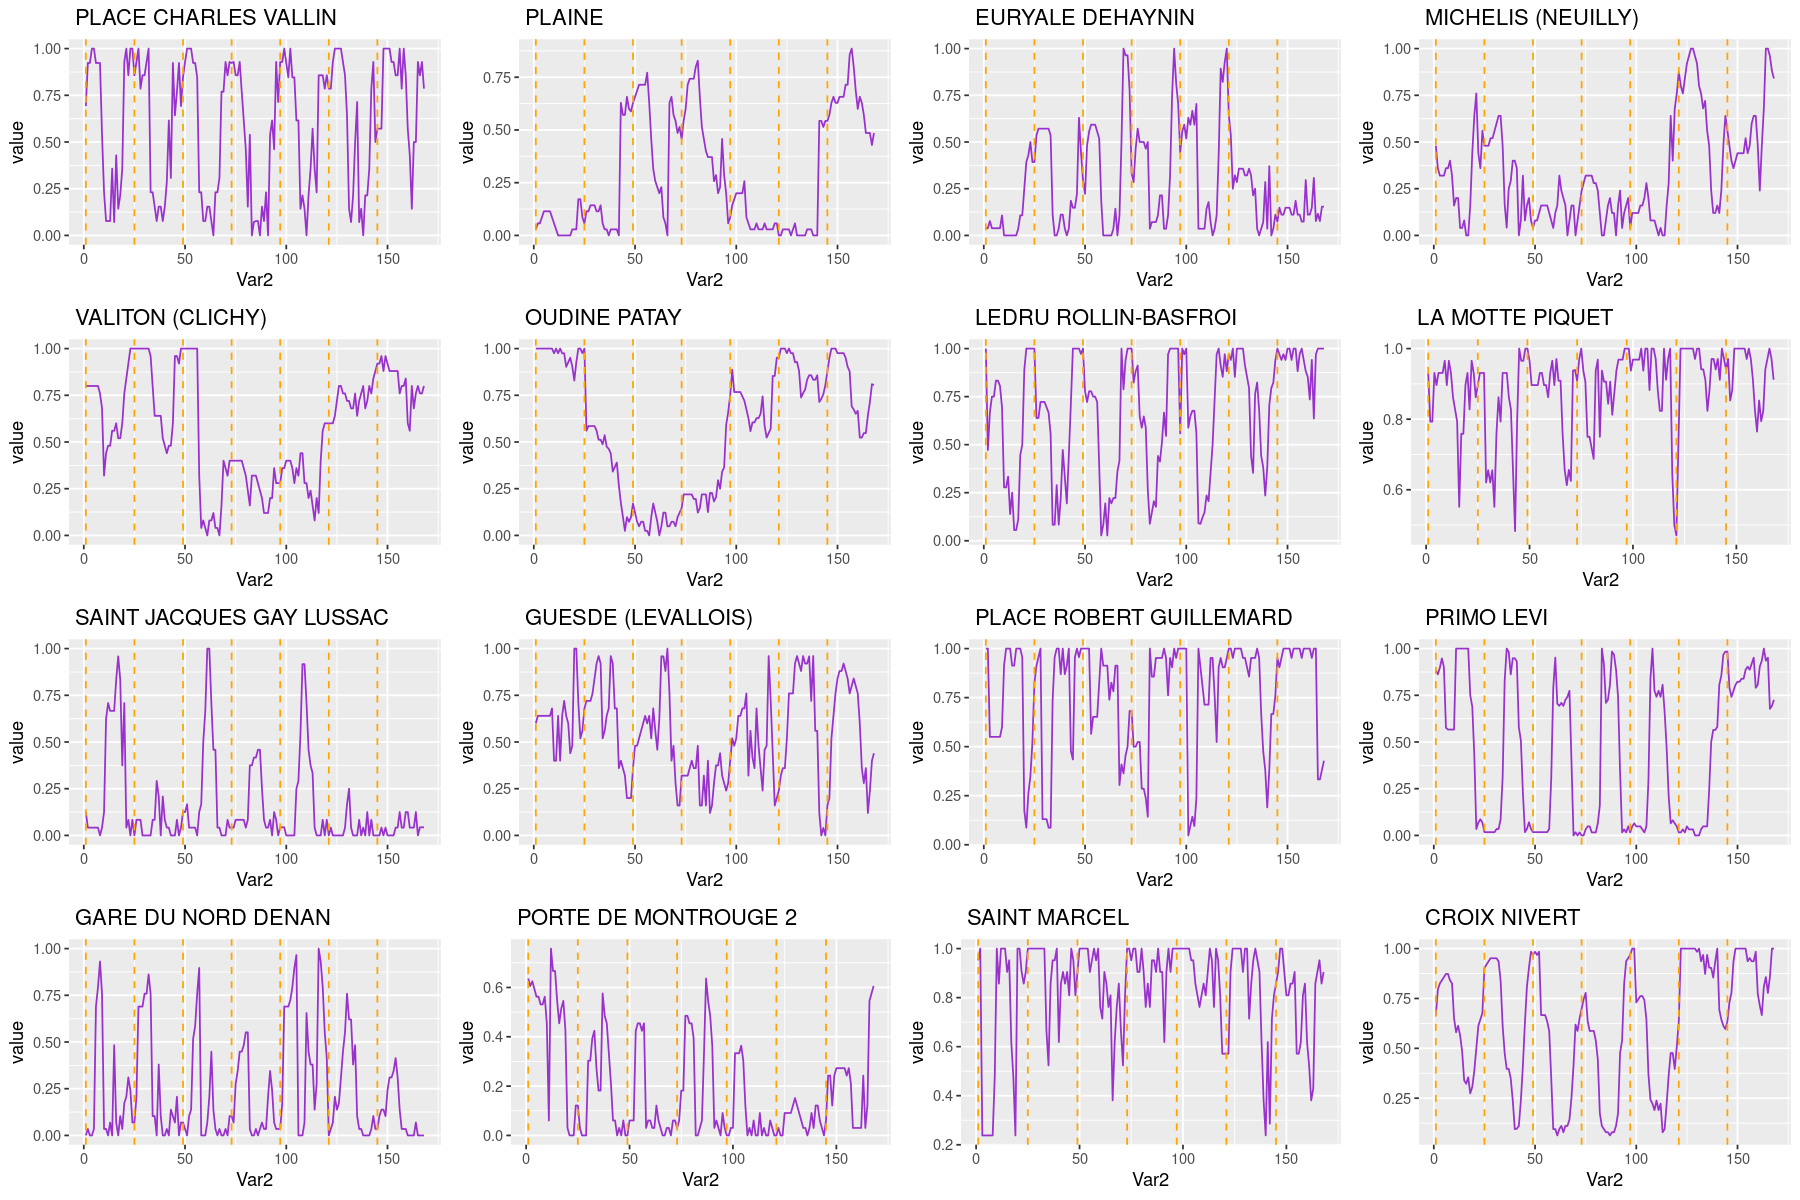

In [6]:

options(repr.plot.width = 15, repr.plot.height = 10)

timeTick = 1 + 24*(0:6)  # vector corresponding to the beginning of days

# select 16 stations
stations = sample.int(nrow(loading), 16)

df = melt(loading[stations,])  #the function melt reshapes it from wide to long

p = list()
for (i in 1:16){
    dfi = df[df$Var1 == velib$names[stations[i]],]
    p[[i]] = ggplot(dfi, aes(x=Var2, y=value)) + 
        geom_line(col="darkorchid") + 
        geom_vline(xintercept=timeTick, col="orange", linetype="dashed") +
        labs(title=velib$names[stations[i]])
}
do.call(grid.arrange,p)

Interprétation : 

On observe une série de graphiques qui représentent le niveau de chargement des stations de Vélib à Paris sur une période de temps d'une semaine, avec des intervalles de temps horaires sur l'axe des abscisses (Time) et le niveau de chargement sur l'axe des ordonnées (Loading).

* Variations temporelles : Chaque graphique montre les variations dans la semaine du nombre de vélos disponibles dans chaque station, parmis 16 prises au hasard. Les pics à 1 indiquent que tous les vélos sont disponibles à ce moment-là. On observe les périodes de la journée où les vélos sont les plus utilisés (les creux dans les graphiques), cela poueeait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. On remarque une temporalité dans certaines stations, avec des taux de chargements similaires sur les 5 premiers jours de la semaine, et des différences au niveau des chargements les week-ends. Les pics correspondes aux périodes où les vélos sont les moins disponibles, c'est à dire les moments où les taux de chargements des stations Vélib sont les plus grands.

* Comparaison entre les stations : En comparant les graphiques entre eux, on peut identifier les stations qui ont un taux de rotation élevé des vélos (grand nombre de variations entre des valeurs élevées et basses) et celles qui sont moins utilisées (moins de variation ou des niveaux plus constants).

### Etude du chargement médian des stations

Avec les courbes précédentes, nous avons pu constater des variations importantes entre les stations. Malgré cela, on retrouve une similarité commune sur la temporalité et les similarités observées sur certains jours. Nous allons étudier le chargement médian des stations pour étudier cette temporalité. Le plus pertinent est ici d'afficher une superposition de boxplots, afin d'étudier la valeur médiane, ainsi que les valeurs des quantiles, en fonction des heures tout au long de la semaine. 

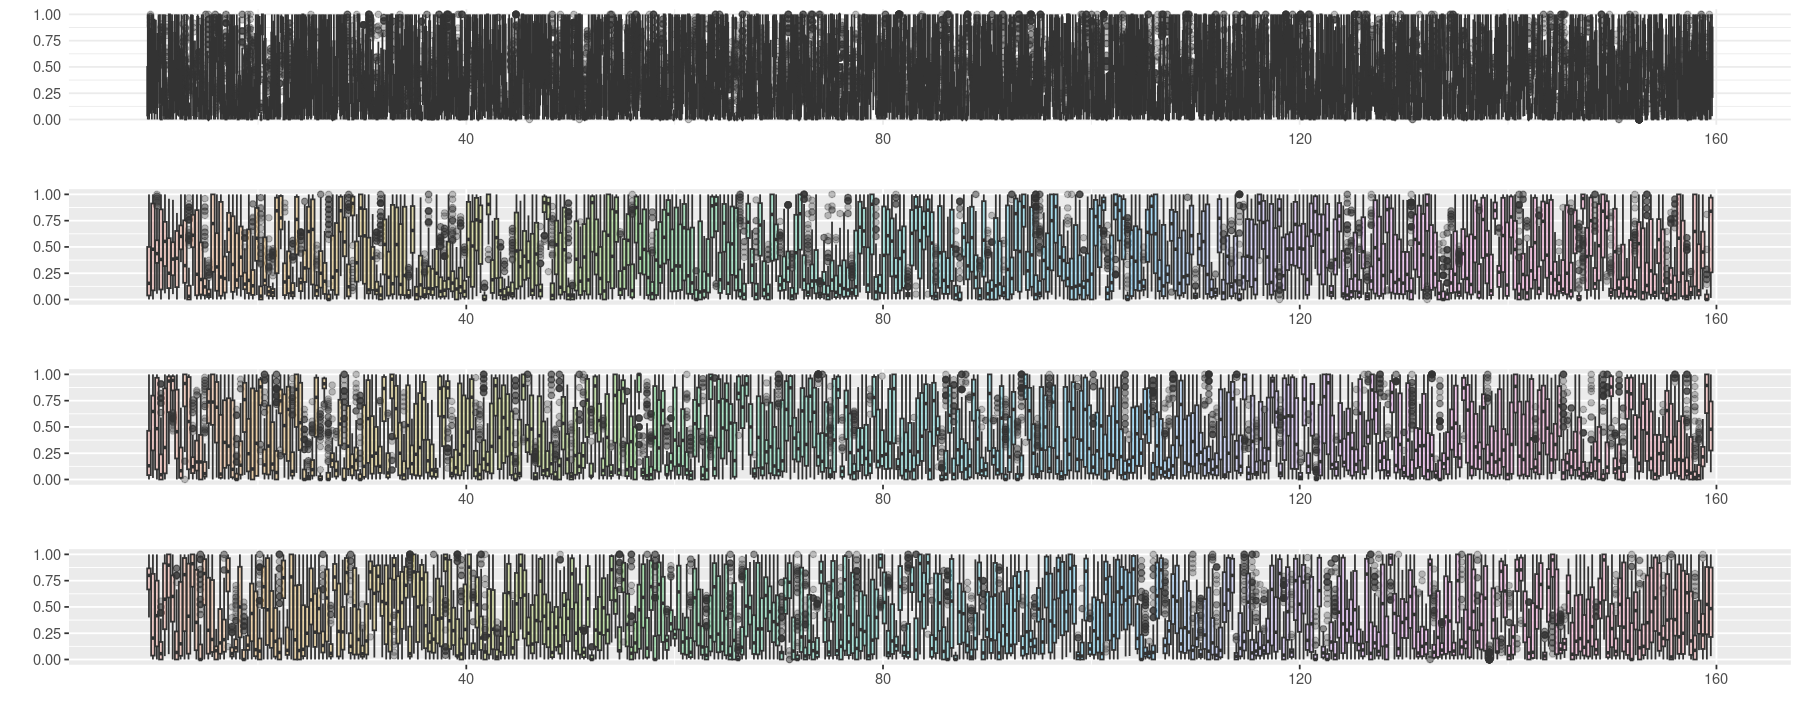

In [7]:

options(repr.plot.width = 15, repr.plot.height = 6)

df = melt(loading)
p1 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('') + theme_minimal()

# --- #

# Only a third of the data
df = melt(loading[ seq(from=1, to=+floor(nrow(loading)/3)) ,])
p2 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The next third
df = melt(loading[ seq(from=1+floor(nrow(loading)/3), to=2*floor(nrow(loading)/3)) ,])
p3 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The remaining third
df = melt(loading[ seq(from=1+2*floor(nrow(loading)/3), to=nrow(loading)) ,])
p4 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# --- #

grid.arrange(p1, p2, p3, p4, nrow=4)
# changer l'affihage en utilisant éventuelelment des représentations avec des lignes, 
# ou un affichage des médianes uniuement (mais on ne voit pas l'amplitude), ou en
# changeant de librairies

Interprétation : 

Ce graphique présente une superposition de boxplots montrant l'évolution du chargement des stations vélib au cours du temps horaire sur une semaine. 

* Série temporelle : La ligne rouge représente la médiane du chargement des stations au fil du temps. Elle montre comment le niveau de chargement change. Ainsi, on peut identifier un modèle cyclique sur les 5 premiers jours de la semaine, qui pourrait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. Ainsi, on voit une forte diminution du taux de chargement tous les matins du lundi au vendredi à la même heure et de la même amplitude sur le boxplot. Puis, le taux de chargement remonte progressivement dans la journée, de manière similaire sur les jours ouvrés. Pour le week-end, on remarque une différence avec une forte atténuation de cet effet pendulaire. Le taux de chargement est plus constant au cours de la journée, avec une forte diminution correspondant à une plus forte utilisation des vélos en fin de journée sur le samedi et dimanche. 

* Amplitude des valeurs : On observe un écart très important entre le premier et le troisième quartile, ce qui traduit une grande variation du taux de chargement entre les stations. De plus, la valeur du premier quartile augmente fortement au cours de la matinée. Cela traduit le fait que beaucoup de stations se déchargent sur cette période. Cela se remarque aussi avec les pics bi-pendulaires observés sur le troisème quartile. En effet, on remarque deux pics bien plus bas que sur les box-plots des autres horaires. Ces pics correspondents aux moments de la journée où les vélos sont les plus utilisés : la valeur du troisième quartile diminue nettement. 

### Etude de la temporalité du chargement moyen au cours de la semaine

Nous avons émis des conjectures sur la similarité de l'évolution des taux de chargement sur less jours de travail, ainsi qu'une différence observée au niveau des week-ends. Nous souhaitons vérifier cette hypothèse. Pour ce faire, nous allons calculer le chargement moyen des sttions sur chaque heure d'une journée, puis comparer l'évolution de cette moyenne en fonction des jours de la semaine. Il est pertinent d'afficher l'évolution de la moyenne sur l'ensemble des jours de la semaine pour étudier la tendance suivie.

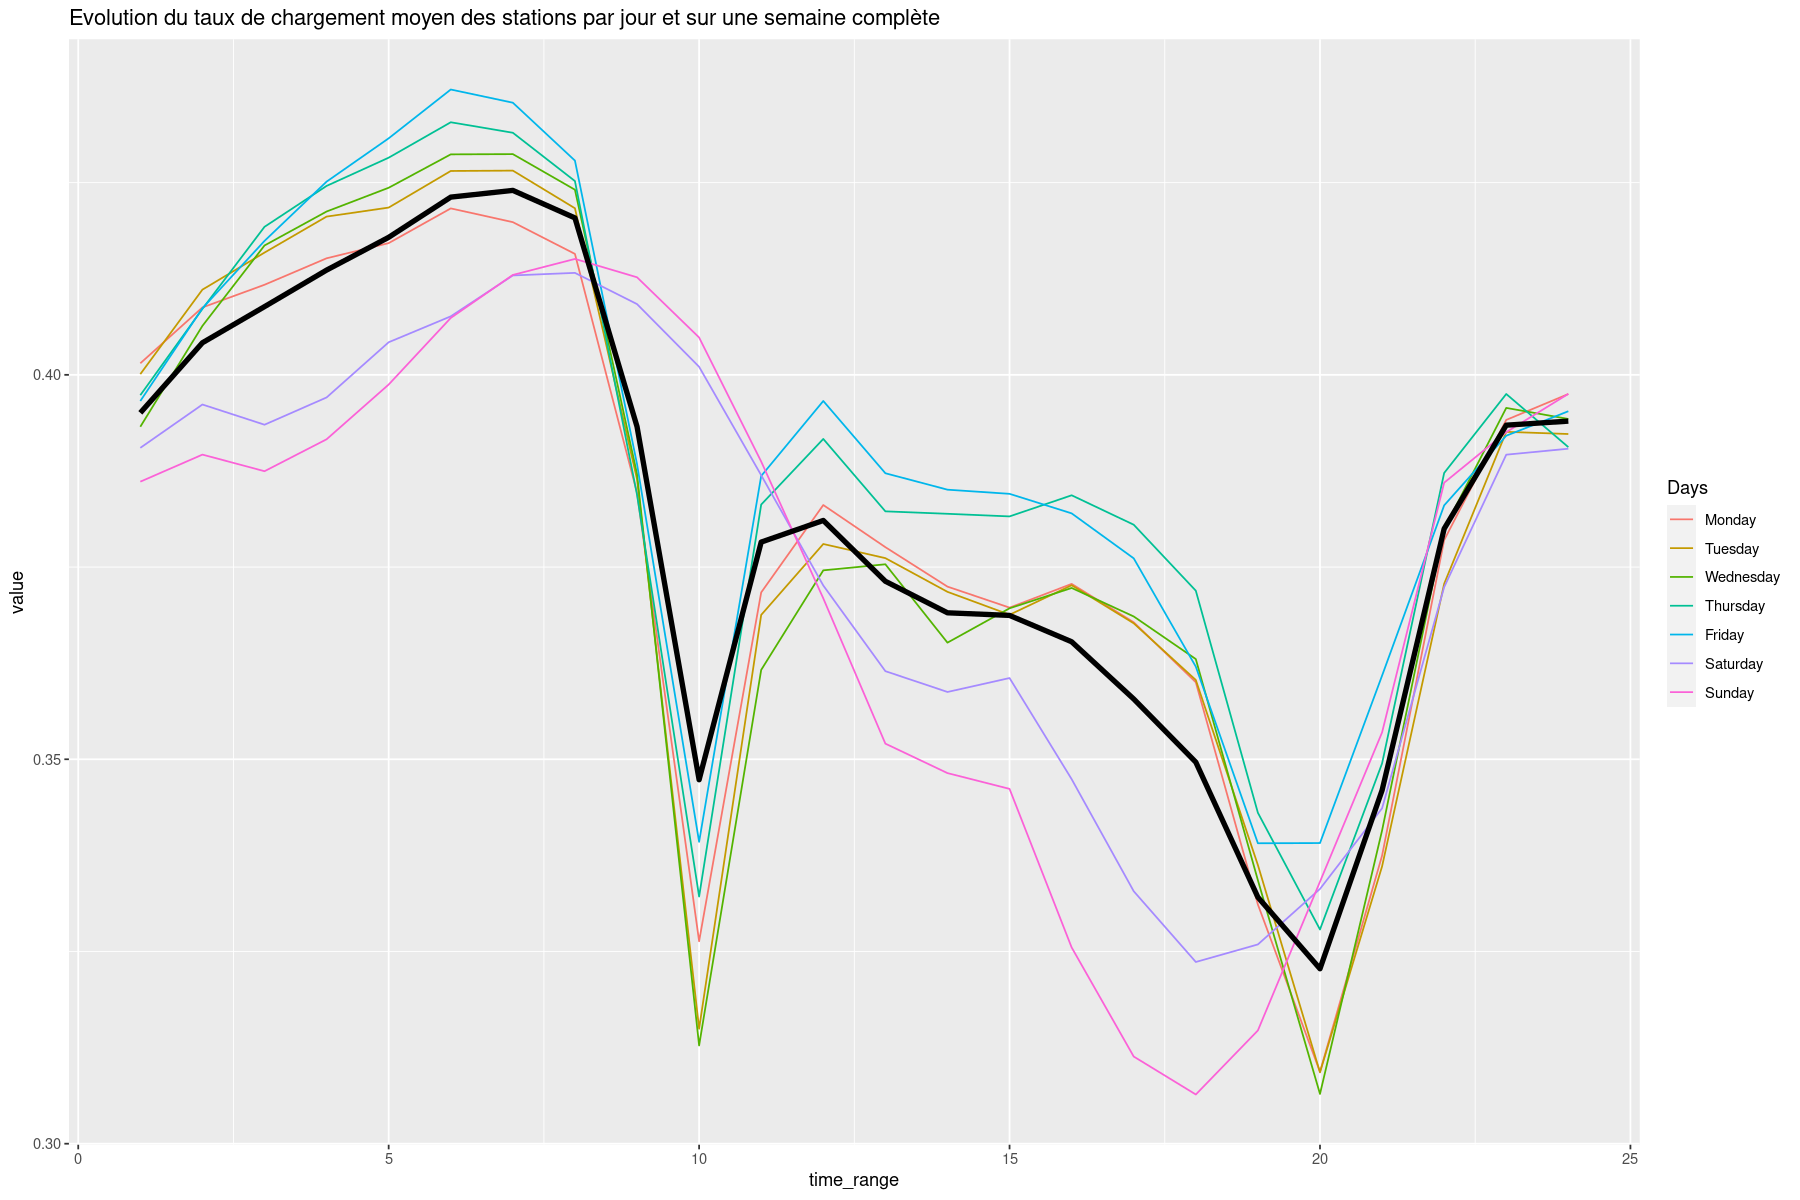

In [74]:
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)

# --- #

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)

# --- #

options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() + 
    ggtitle("Evolution du taux de chargement moyen des stations par jour et sur une semaine complète")+
    geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
    geom_line(data=mean_per_hour, aes(x=time_range, y=Weekly), linewidth = 1.5)

#rajouter un titre 

Interprétation : 

Tout d'abord, on peut visualiser des variations quotidiennes. Chaque ligne colorée représente un jour différent de la semaine, et la ligne noire représente la moyenne sur toute la semaine. On peut observer les tendances de chargement des stations pour chaque jour travaillé. On confirme également que le taux de chargement est différent pendant les week-ends, avec néanmoins une similarité observée entre le samedi et le dimanche. De plus, la moyenne hebdomadaire suit la tendance des jours travaillés. 

On remarque aussi des pics et des creux. Les pics représentent les heures où les stations sont les plus chargées en moyenne, ce qui pourrait correspondre aux heures avant que les gens ne se rendent au travail ou à l'école. Les creux représentent les heures où les stations sont les moins chargées, ce qui pourrait correspondre aux heures de pointe où les vélos sont utilisés pour les trajets. Cela va dans le même sens que nos hypothèses sur les boxplots superposés.

On peut en déduire des habitudes dans les comportements des utilisateurs. Par exemple, si les stations sont moins chargées vers 8h et 18h, cela pourrait indiquer les heures de début et de fin de journée de travail typiques.

En examinant les différences entre les jours de la semaine, on peut identifier des tendances spécifiques, comme des jours avec une plus grande utilisation des vélos. Par exemple, si les lignes pour le samedi et le dimanche montrent un chargement plus élevé pendant la journée, cela pourrait indiquer une utilisation récréative plus importante pendant les week-ends.


### Etude des stations vélib sur une carte 

Nous avons constaté des fortes disparités du taux de chargement en fonction des stations en affichant le pannel aléatoir de 16 sations de notre jeu de données. Nous nous demandons si cette disparité est due à l'emplacement géographique des stations. Par exemple, nous pouvons nous demander si le fait que certaines stations commencent la journée avec un taux de chargement faible pourraient être des stations se situant dans des quartiers de bureaux (généralement au centre, vers La Défense...), et se remplissent fortement dans la matinée. A contrario, certaines stations situées en périphérie pourraient commencer la journée avec un taux de remplissage élevé, puis se vider sur la période de départ au travail/école, et se remplir à nouveau en fin de journée. 

Pour étudier cela, nous allons étudier le taux de remplissage des staions sur une carte sur une même journée, à différents moments.

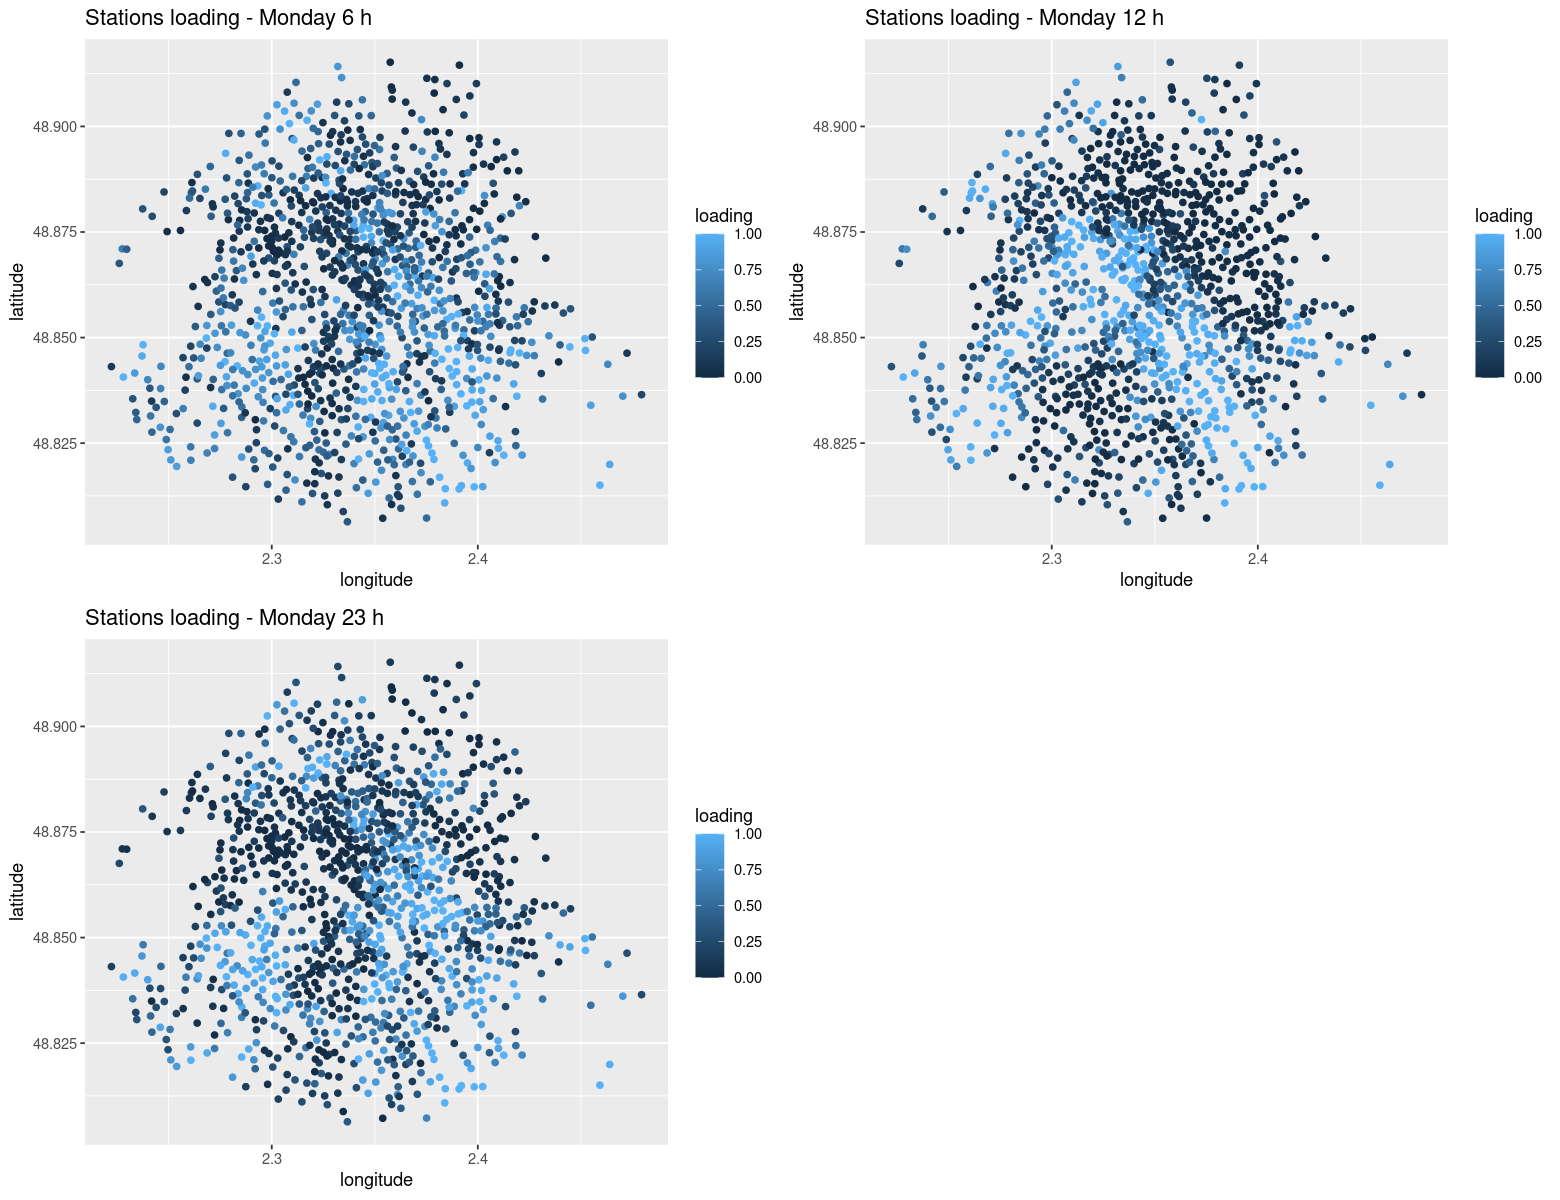

In [45]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 12, 23) # Monday at hour 6h, 12h, 23h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))

Les axes représentent la latitude et la longitude, positionnant ainsi les stations de Vélib sur une carte de Paris.
La couleur de chaque point représente le niveau de chargement de la station à l'heure indiquée, avec un code couleur allant du violet (peu ou pas de vélos disponibles) au jaune (station complètement chargée).

* Analyse à 6 heures (premier graphique à gauche) :

À 6 heures du matin, on observe une majorité de stations avec un chargement moyen à élevé (beaucoup de points jaunes et oranges). Cela suggère que les vélos ne sont pas encore largement utilisés à cette heure, ce qui est attendu tôt le matin. Et confirme l'hypothèse sur les stations en banlieu ou périphérie.

* Analyse à 12 heures (graphique du milieu) :

À midi, les couleurs sont peu variées. En effet, les stations sont soit assez pleines, soit assez vides. Il n'y a pas vraiment de station avec un taux de chargement moyen. De plus, on observe un regroupement central des stations présentant de la disponibilité. Ce regroupement peut correspondre aux quartiers de bureaux. 

* Analyse à 23 heures (dernier graphique à droite) :

À 23 heures, on observe une situation qui se rapproche de celle du même jour à 6h du matin. La répartition est plus homogène et les stations sont globalement chargées, les vélos sont disponibles, il y compris en périphérie.Cela pourrait indiquer que les gens ont tendance à moins utiliser les vélos en fin de soirée, qu'ils sont rentrés dans des quartiers résidentiels, ou que les vélos ont été retournés aux stations après les déplacements de la journée.


Ces cartes de chaleur peuvent également aider les gestionnaires de Vélib à identifier les zones où il y a une demande élevée de vélos à certaines heures, et où un rééquilibrage pourrait être nécessaire pour s'assurer que les utilisateurs trouvent des vélos disponibles en fonction de l'heure.

Finalement, cette analyse concorde avec nos hypothèses sur les taux de remplissages en fonction des types de quartiers (résidentiels ou de bureaux). ).

### Etude des déplacements pendulaires sur une carte

Pour mettre en lumière les déplacements pendulaires, et ainsi confirmer ou invalider nos hypothèses, nous allons représenter ce même style de graphique avant les déplacements pendulaires (par exmple le matin assez tôt), et après (par exemple en milieu de matinée).

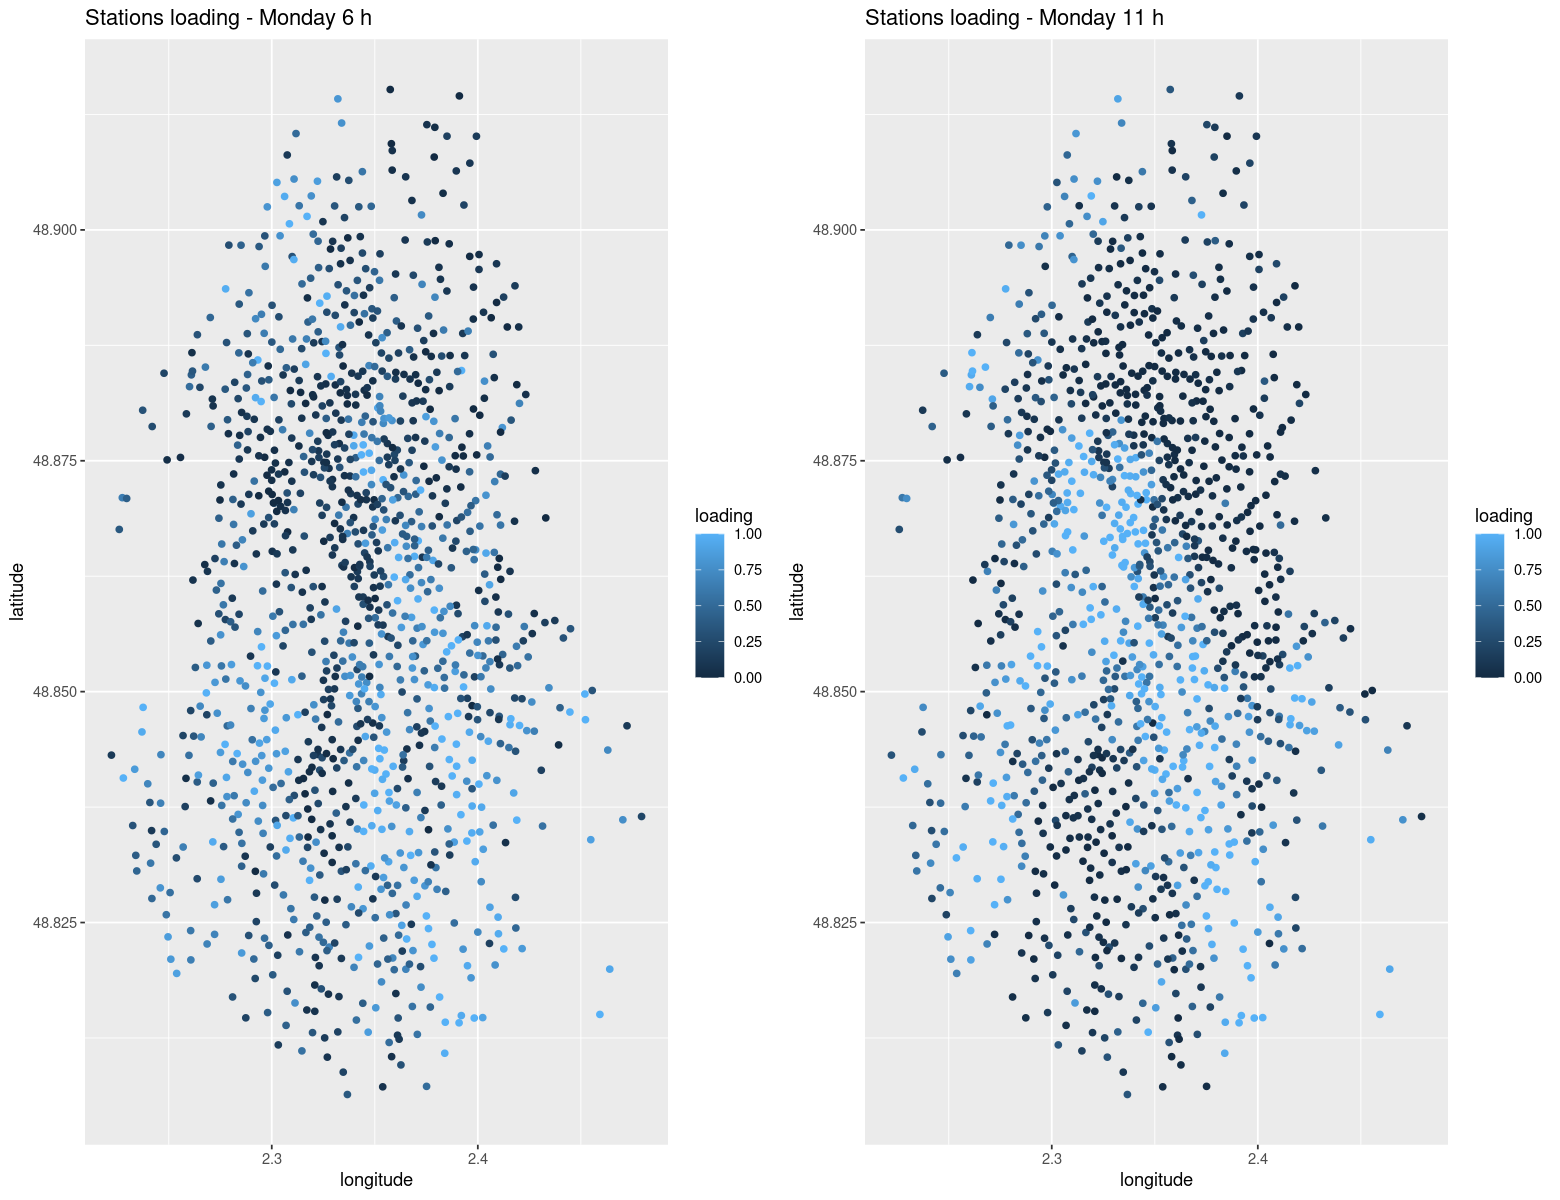

In [46]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 11) # Monday at hour 6h, 11h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))

Interprétation : 

Sur cette carte, nous observons clairement que les stations en périphérie se vident au profit des stations au centre. De plus, puisque les tendances observées sur tous les jours travaillés sont les mêmes (cf : Etude de la temporalité du chargement moyen au cours de la semaine), on peut alors valider notre hypothèse selon laquelle les déplacements pendulaires font que les vélos sont utilisés de l'extérieur de la ville vers le centre, où sont regroupés les quartiers de bureaux. 

### Influence de l'altitude des stations sur les taux de chargement

Nous avons présenté la colonne bonus dans l'introduction de ce projet. Nous allons regarder si cet élément à une influence sur le taux de chargement des stations. Pour ce faire, nous allons commencer par étudier la répartition des stations en altitude.

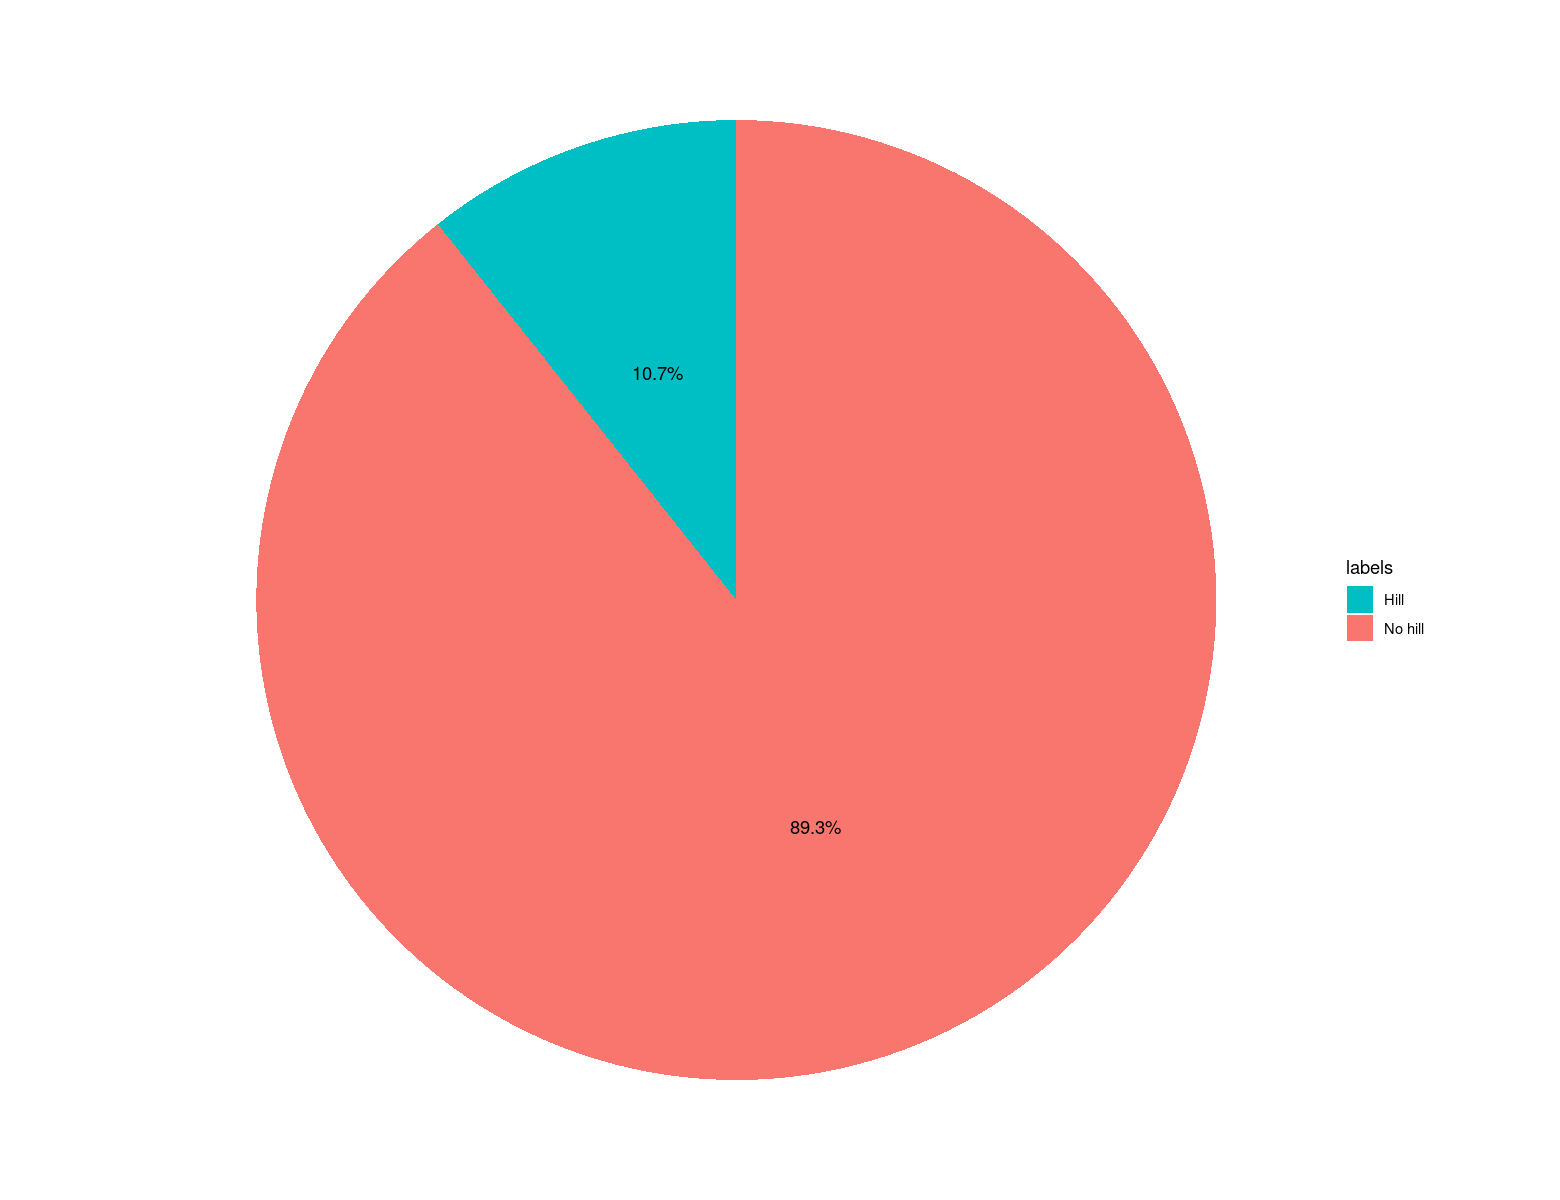

In [47]:
ggtitle("Titre du graphique")# Créer un dataframe avec les données
df <- data.frame(size = c(sum(coord$bonus == 0), sum(coord$bonus == 1)),
                 labels = c('No hill', 'Hill'))

# Calculer les pourcentages
df$percentage <- df$size / sum(df$size) * 100

# Créer le graphique en coordonnées polaires avec ggplot2
ggplot(df, aes(x = "", y = percentage, fill = labels)) +
  geom_bar(stat = "identity", width = 1, position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_fill(vjust = 0.5)) +
  coord_polar(theta = "y") +
  scale_fill_hue(direction = -1) +  # pour inverser l'ordre du colormap par défaut
  theme_void()


Interprétation : 

La grande majorité des stations Vélib, soit 89.3%, sont situées en plaine. Cela suggère que la plupart des stations sont dans des zones relativement plates de la ville. Seulement 10.7% des stations sont situées en altitude. Ces stations peuvent se trouver sur des collines ou dans des zones élevées de la ville.

Cette répartition peut avoir des implications sur l'usage des vélos. Les stations en plaine sont probablement plus fréquentées en raison de la facilité de pédalage sur terrain plat. Les stations en altitude pourraient avoir moins de fréquentation en raison de l'effort supplémentaire requis pour y accéder ou en partir, bien qu'elles puissent servir des zones résidentielles situées en hauteur.

Cela peut avoir un impact sur des opérations logistiques. Il peut y avoir des opérations de rééquilibrage des vélos (s'assurer que les stations ne soient ni vides ni pleines). Il peut être plus difficile de maintenir un bon équilibre pour les stations en altitude, en particulier si les utilisateurs ont tendance à prendre les vélos en descente et non en montée.

### Représentation des stations en altitude sur une carte

Nous allons étudier la répartition géographique des stations en altitude. De manière analogue aux première visualisations sur cartes, nous allons représenter la répartition des stations en altitude sous forme de nuage de points. En s'appuyant sur nos observations précédentes, nous allons voir si cet élément peut avoir une influence sur les chargements des stations.

Nous allons également juxtaposer la carte montrant le taux de chargement à 6h du matin pour comparer avec le taux de chargement des stations.

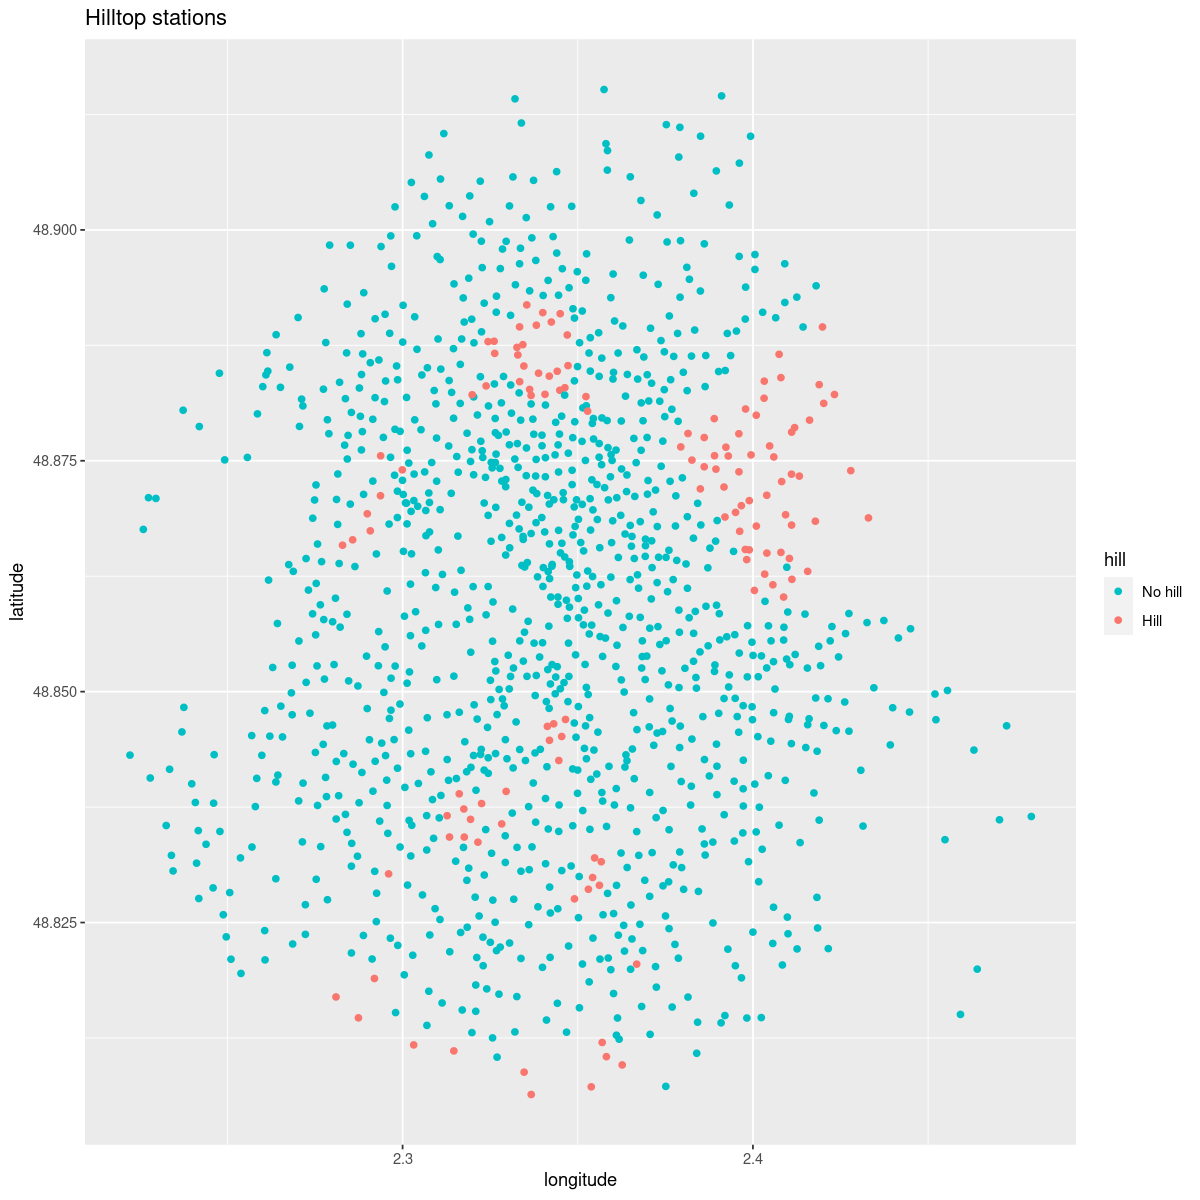

In [69]:
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

# --- #

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')


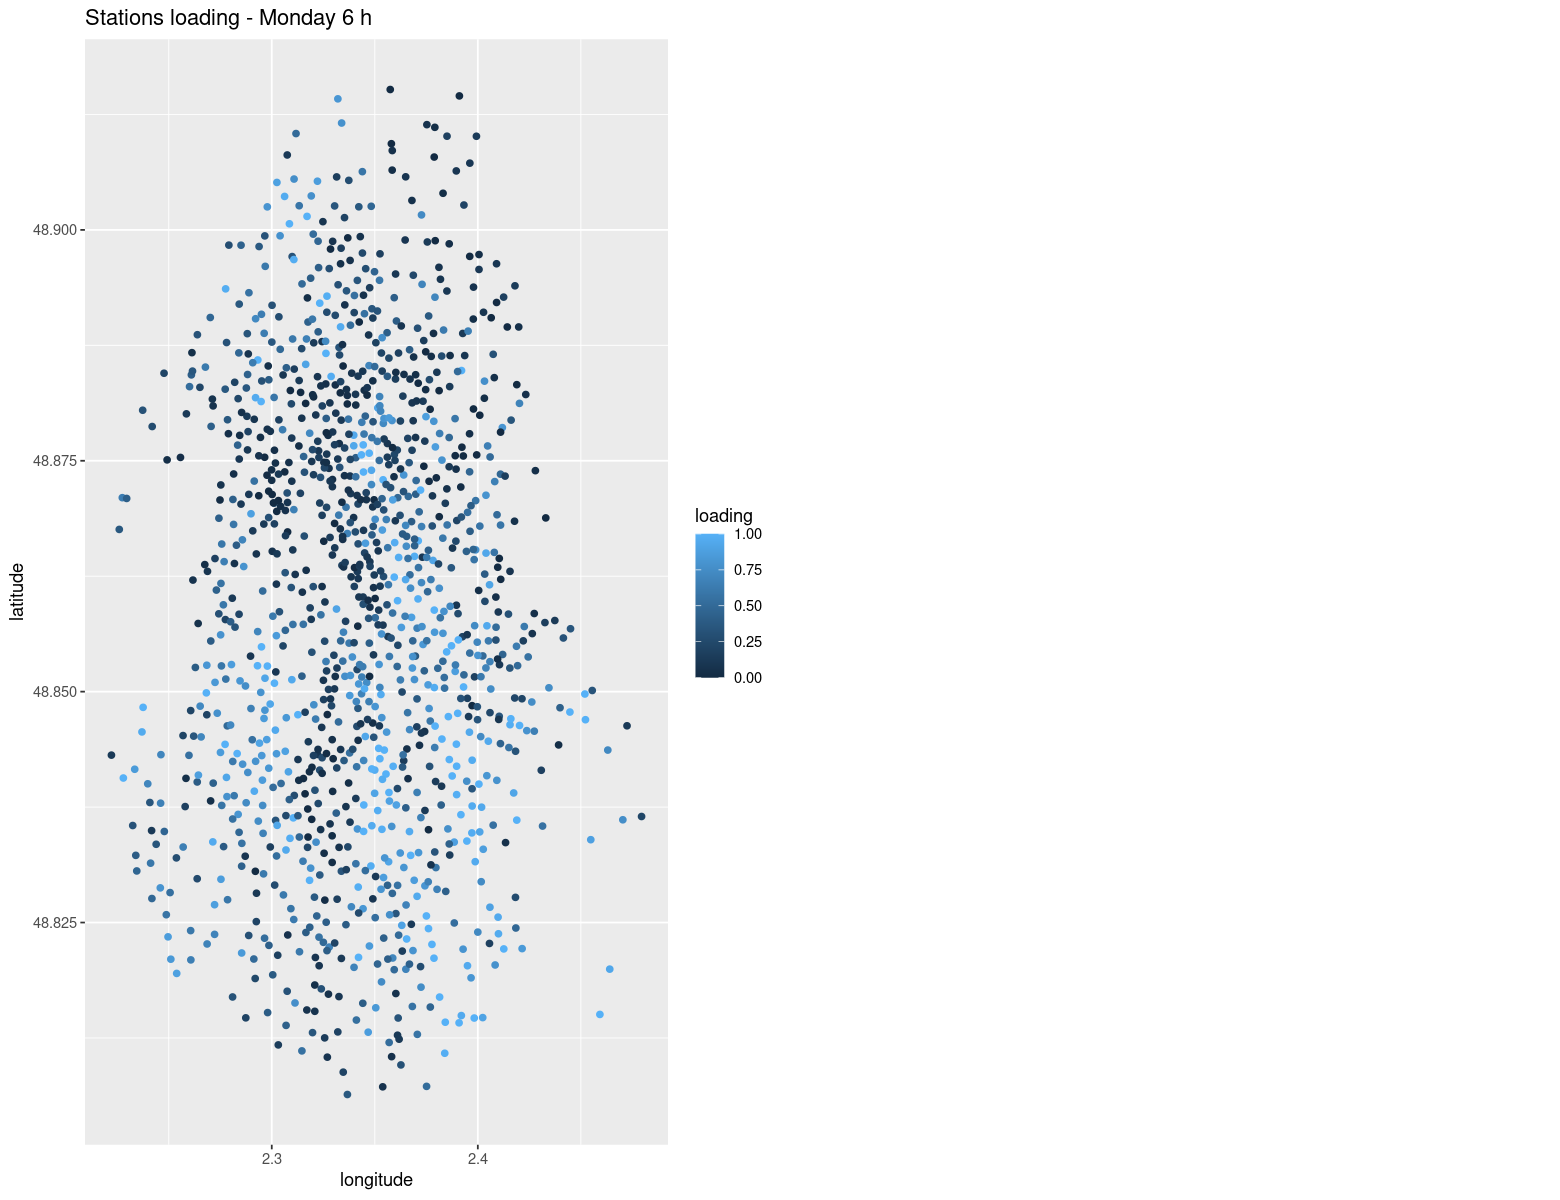

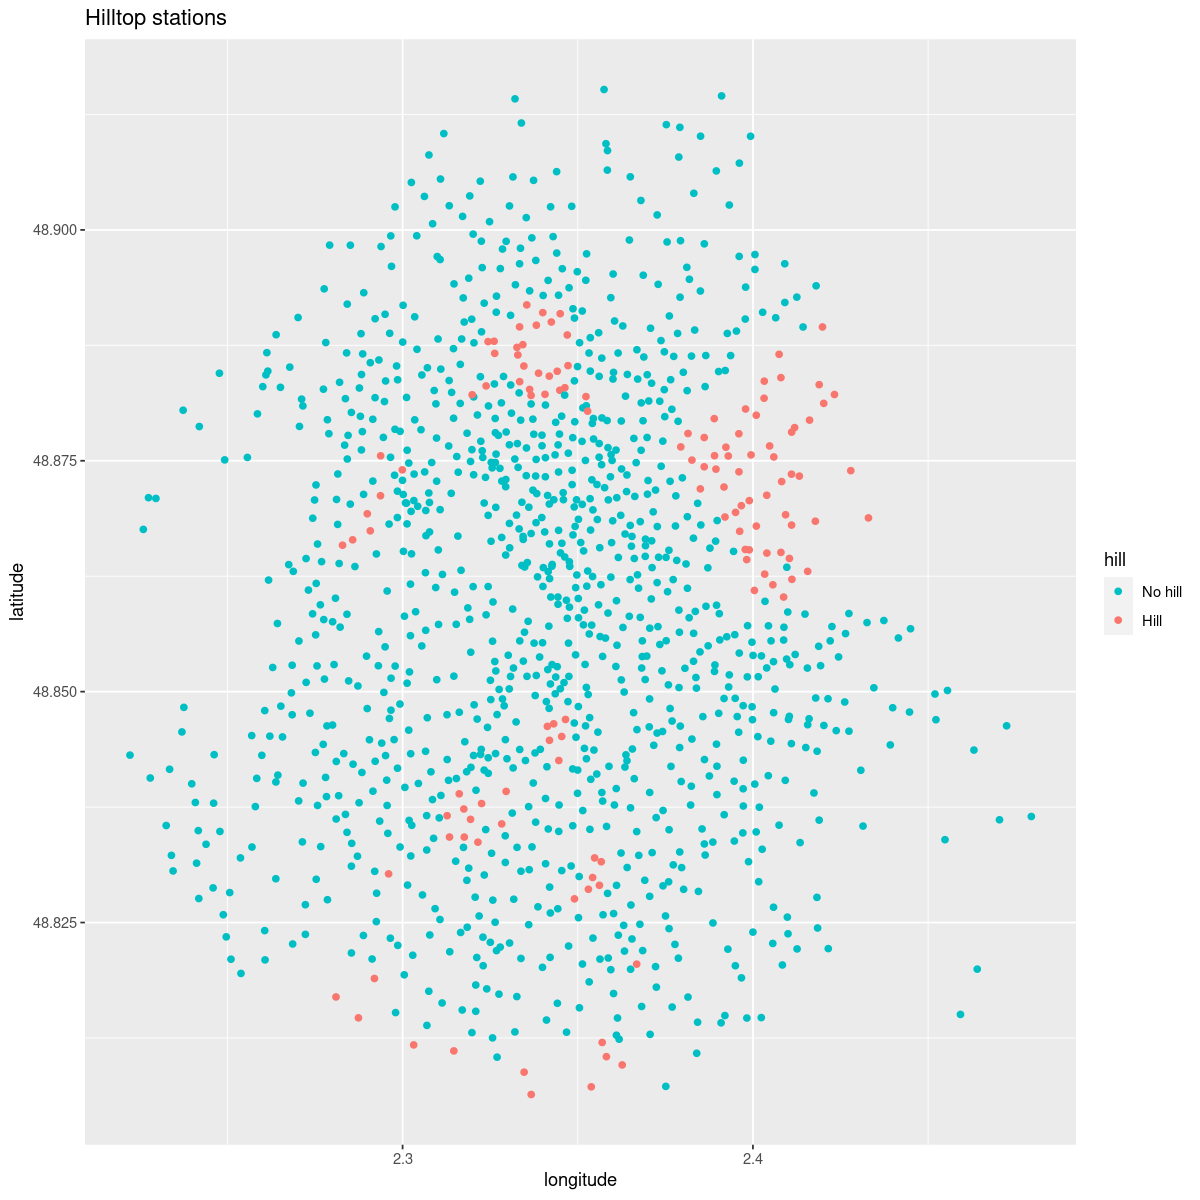

In [73]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6) # Monday at hour 6h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

# --- #

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')


Interprétation :

    Distribution géographique :

Les stations situées en plaine sont largement réparties sur toute la carte, indiquant une bonne couverture de ces zones par le réseau Vélib. Les stations en altitude sont moins nombreuses et semblent être groupées dans certaines zones, ce qui est cohérent avec le diagramme en camembert précédent indiquant que seulement 10,7 % des stations sont en altitude.

    Accessibilité et préférences d'utilisation :

Comme les stations en plaine sont plus nombreuses et probablement plus accessibles, elles sont susceptibles d'être plus utilisées, comme nous l'avons discuté précédemment. Cela pourrait être dû à la facilité de pédaler sur un terrain plat. Les stations en altitude peuvent avoir des taux d'utilisation plus faibles, notamment parce que les efforts nécessaires pour atteindre ces stations sont plus importants, ce qui peut dissuader leur utilisation, surtout lorsqu'il s'agit de remonter.

    Implications pour la planification urbaine :

L'emplacement des stations en altitude peut nécessiter une attention particulière de la part des planificateurs urbains et des gestionnaires de Vélib pour garantir une distribution équilibrée des vélos et pour encourager leur utilisation, peut-être en offrant des incitations. Cependant, en juxtaposnt les deux cartes comme dans la deuxième partie du graphique, on remarque que les stations en altitudes ont un faible taux de remplissage le matin à 6h. On en déduit que les vélos ne sont pas nécéssairement remontés dans ces stations, peut être parce qu'ils ne sont pas beaucoup demandé. Cela va dans le sens du caractère plus sportif de leur accessibilité.

    Corrélation avec la topographie :

La concentration des stations en altitude dans des zones spécifiques peut correspondre à la topographie de Paris, avec des collines comme Montmartre ou Belleville. Cela montre que le réseau Vélib tient compte du relief de la ville dans la planification de l'emplacement des stations.


## Conclusion sur l'étude descriptive

L'étude statistique a fourni des perspectives significatives sur la dynamique d'utilisation des stations Vélib à Paris. Nous avons examiné plusieurs aspects, notamment la disponibilité des vélos à différentes heures de la journée et des jours de la semaine, la distribution géographique des stations par rapport à la topographie de la ville et la répartition des stations entre les zones de plaine et les zones en altitude.

Les graphiques temporels ont montré des modèles d'utilisation distincts au cours de la journée, avec des pics de disponibilité des vélos tôt le matin et tard le soir, et une diminution pendant les heures de pointe. Ces tendances sont probablement liées aux habitudes de déplacement des parisiens, avec un usage plus intense lors des trajets pendulaires et une utilisation moindre durant les heures creuses.

La répartition spatiale des stations de Vélib a révélé que la majorité des stations sont situées en plaine, facilitant l'accès et l'utilisation. En revanche, une minorité de stations situées en altitude pourrait indiquer des défis spécifiques, tels que des efforts supplémentaires pour atteindre ces stations, pouvant expliquer une utilisation moins fréquente.

Nous allons maintenant étudier les possibilités de réduction de dimension de nos jeux de données.